In [1]:
pwd

'C:\\Users\\SMART-14\\python_practice'

### 1.라이브러리 선언

In [2]:
from tensorflow import keras
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\SMART-14\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 2. 데이터 불러오기 및 정제

In [3]:
imageList=[]
labelList=[]

In [8]:
basedir = "D:/image/MNIST/trainingSet/"

In [9]:
import cv2

In [10]:
categories = os.listdir(basedir)
IMG_SIZE = 28
categories

['0_zero',
 '1_one',
 '2_two',
 '3_three',
 '4_four',
 '5_five',
 '6_six',
 '7_seven',
 '8_eight',
 '9_nine']

In [11]:
categories = os.listdir(basedir)
IMG_SIZE = 28


for i in range(0,len(categories)):

    pathDirectories=os.path.join(basedir, categories[i]) 
    pathImages = os.listdir(pathDirectories)
    for j in range(0,len(pathImages)):
        eachImagePath = os.path.join(pathDirectories,pathImages[j])
        
        try:
            ##회색 이미지로 변환
            eachImage=cv2.imread(eachImagePath, cv2.IMREAD_GRAYSCALE)
            ###크기변환
            cv2.resize(eachImage,(IMG_SIZE,IMG_SIZE))
            imageList.append(eachImage)

            labelList.append(i)
        except Exception as e :
            print(e,eachImagePath)
            pass

In [12]:
np.array(imageList).shape

(42000, 28, 28)

In [13]:
np.array(labelList).shape

(42000,)

In [14]:
pd.DataFrame(imageList[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,3,0,0,3,7,3,0,3,0,11,...,0,3,0,0,0,2,0,0,0,0
1,0,0,0,0,0,0,0,1,5,0,...,8,3,0,4,8,0,0,0,0,0
2,0,0,2,0,0,0,1,2,1,12,...,0,6,7,2,0,0,0,0,0,0
3,0,1,3,0,0,2,3,0,0,0,...,11,3,0,0,4,0,0,0,0,0
4,0,1,1,0,0,2,0,0,6,0,...,0,0,3,1,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,3,88,...,37,1,0,2,2,0,0,0,0,0
6,2,0,0,3,0,0,4,27,193,251,...,213,89,0,0,14,1,0,0,0,0
7,0,0,0,6,0,0,18,56,246,255,...,255,231,119,7,0,5,0,0,0,0
8,4,0,0,12,13,0,65,190,246,255,...,250,255,234,92,0,0,0,0,0,0
9,0,10,1,0,0,18,163,248,255,235,...,255,255,252,172,0,15,0,0,0,0


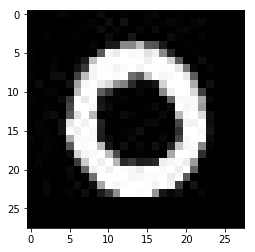

In [15]:
plt.imshow(imageList[0], cmap="gray")

In [16]:
imageArray = np.array(imageList)
labelArray = np.array(labelList)

In [17]:
print(imageArray.shape)
print(labelArray.shape)

(42000, 28, 28)
(42000,)


###  데이터 정제 (2가지! 데이터 정규화 ,합성곱신경망을 위한  shape 변환)

In [18]:
refinedImages=imageArray.astype(float)/255.0

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
trainingData_features,validData_features,trainingData_labels,validData_labels= \
train_test_split(refinedImages, labelArray , test_size =0.3 , random_state =2)

In [21]:
trainingData_labels[20000]

4

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
## 원핫인코딩 적용
trainingData_labels_one =to_categorical(trainingData_labels)
validData_labels_one=to_categorical(validData_labels)
trainingData_labels_one[15000]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
np.argmax(trainingData_labels_one[15000]) ## np.argmax는 다차원 배열의 경우에 차원에 따라 가장 큰값의 인덱스 반환해주는 함수

2

In [25]:
## 합성곱 신경망 depth추가
trainingData_features=trainingData_features.reshape(len(trainingData_features),IMG_SIZE,IMG_SIZE,1)

In [26]:
validData_features=validData_features.reshape(len(validData_features),IMG_SIZE,IMG_SIZE,1)

In [27]:
print(trainingData_features.shape)
print(validData_features.shape)

(29400, 28, 28, 1)
(12600, 28, 28, 1)


### 3.모델 생성

In [28]:
from tensorflow import keras
from tensorflow.keras import Sequential ## 모델을 층층이 쌓기 위해
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten
## 합성곱신경망을 쓰는 이유  feature를 추출해서 학습

In [29]:
model = Sequential()

In [30]:
input_shape = trainingData_features[0].shape

In [31]:
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape=input_shape)) ##padding은 기존의 이미지가 축소되지 않기 위해

In [32]:
model.add(MaxPool2D(pool_size=2))

In [33]:
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu"))

In [34]:
model.add(MaxPool2D(pool_size=2))

In [35]:
model.add(Flatten())

In [36]:
model.add(Dropout(0.8))

In [37]:
model.add(Dense(units=len(categories),activation="softmax"))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [39]:
from tensorflow.keras.utils import plot_model

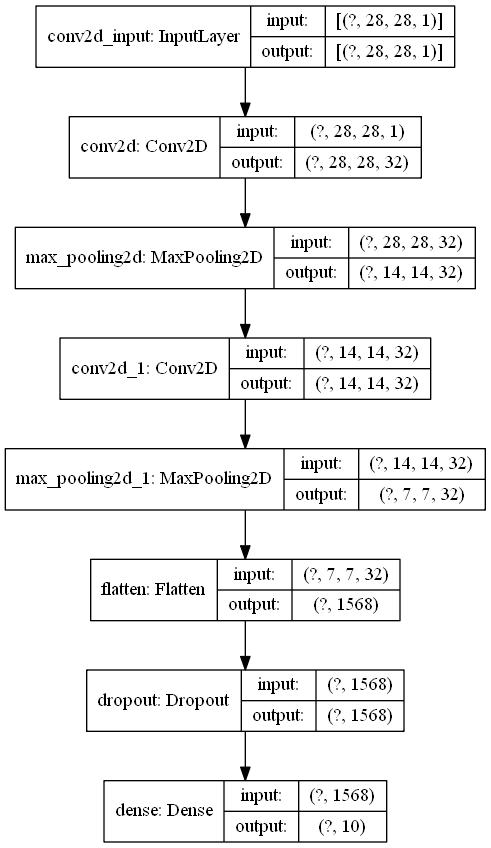

In [40]:
plot_model(model,show_shapes=True)

### 4.모델 컴파일(평가기준 및 코칭방법 설정)

In [41]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

### 5.모델 훈련

In [42]:
model.fit(x=trainingData_features,
          y=trainingData_labels_one,
          validation_data=(validData_features,validData_labels_one),
          batch_size=32,
          epochs=4
         )

Train on 29400 samples, validate on 12600 samples
Epoch 1/4
29400/29400 [==============================] - 15s 513us/sample - loss: 0.5715 - accuracy: 0.8122 - val_loss: 0.1387 - val_accuracy: 0.9587
Epoch 2/4
29400/29400 [==============================] - 14s 476us/sample - loss: 0.2307 - accuracy: 0.9301 - val_loss: 0.0992 - val_accuracy: 0.9702
Epoch 3/4
29400/29400 [==============================] - 14s 479us/sample - loss: 0.1885 - accuracy: 0.9401 - val_loss: 0.0815 - val_accuracy: 0.9744
Epoch 4/4
29400/29400 [==============================] - 14s 475us/sample - loss: 0.1659 - accuracy: 0.9486 - val_loss: 0.0761 - val_accuracy: 0.9752


### 6.모델 추론

In [43]:
loss,model_accuracy=model.evaluate(validData_features,validData_labels_one)

12600/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [44]:
model_accuracy

0.97515875

### 7. 모델예측

In [45]:
testImg=cv2.imread("d:/cap_test.jpg",cv2.IMREAD_GRAYSCALE)

In [46]:
testImgSize=cv2.resize(testImg,(IMG_SIZE,IMG_SIZE))

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
plt.imshow(testImgSize,cmap="gray")

In [ ]:
sample_test = testImgSize.astype(float)/255.0
sample_test.shape

In [ ]:
sample_test=sample_test.reshape(1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
np.argmax(model.predict(sample_test))

In [ ]:
model_json=model.to_json()

In [ ]:
with open('d:/model_mnist_kopo.json','w') as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("d:/model_mnist_kopo_weight.h5")